# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 6

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nose.tools import assert_equal, assert_count_equal
from numpy.testing import assert_almost_equal
import math

# First Course: chap 3.3 Friendship Paradox

1. Maak een netwerkx netwerk van Figuur 3.5.
2. Waarom is de kans dat je Tom vindt met de "random friend of picked person" methode $\frac{5}{21}$. Geef een heel helder antwoord.
3. Programmeer de functie `kans_op_knoop(G,knoop)` die voor elk netwerk, voor elke knoop de kans berekent dat je die knoop trekt met de "random friend of picked person" methode.
4. Schrijf een test die checked dat die kansen optellen tot 1.
5. **Advanced** In de een na laatste paragraaf van 3.3 op blz 76 wordt een andere manier om die kansen te berekenen gemeld, die dezelfde uitkomst geeft. Programmeer die ook, en vergelijk de uitkomsten.
    

In [2]:
Fig35=nx.Graph()

Fig35.add_edges_from([('Mary', 'Nancy'), ('Tom', 'Nancy'), ('Nancy', 'Bob'), ('Bob', 'Tara'), ('Tom', 'Bob'), ('Tom', 'John'), 
                      ('Tom', 'Pam'), ('John', 'Pam')])
#nx.draw(Fig35, with_labels = True)
#Indien de vriend van een willekeurig individu wordt gekozen is er een 5/21 kans dat Tom gekozen wordt. Tom is namelijk 
#verbonden met 4 andere mensen (inclusief zichzelf is dat 5)

def kans_op_knoop(G,knoop):
    import random
    aantal = 0
    totaal = 0

    for n in G.nodes():
        rndm = random.choice(list(G.neighbors(n))) 
        if rndm == knoop:
            aantal += 1

        totaal += 1

    kans = aantal / totaal
    return kans

 
knopen = list(Fig35.nodes())
totale_kans = 0

for knoop in knopen:
    kans = kans_op_knoop(Fig35, knoop)
    totale_kans += kans
    
print(totale_kans == 0)
H= nx.karate_club_graph() 
# test
sum(kans_op_knoop(H,x) for x in H)
#kans_op_knoop(H,1)

False


0.8823529411764706

In [3]:
assert isinstance(Fig35, nx.Graph)
H= nx.karate_club_graph()
assert 0 <= kans_op_knoop(H,1)<= 1


# First course

Maak de sommen 3.11-3.24.

In [4]:
#3.11
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 5), (5, 6), (5, 7), (3, 4)])


degree =nx.degree_centrality(G)

max_degree = [key for key, value in degree.items() if value == max(degree.values())]
print(max_degree)

betweenness = nx.betweenness_centrality(G)
max_between = [key for key, value in betweenness.items() if value == max(betweenness.values())]
print(max_between)

close = nx.closeness_centrality(G)
max_close = [key for key, value in close.items() if value == max(close.values())]
print(max_close)

product_cost = {
    "apples": 0.50,
    "fruit": 1.20,
    "bananas": 0.40
}


#3.12: de graph zou rechts positieve verdeling (right skewed distribution) hebben

#3.13 
#1: nee want meeste zullen rond het gemiddelde hebben en de rest zal niet met grote mate verschillen
#2: Ja, wegens ongelijkheid in de VS zullen er grote verschillen zijn
#3: Ja want een aantal twitter accounts zijn in grote mate verbonden terwijl andere juist het tegenovergestelde zijn (privé accounts)
#4: Nee, want het is redelijk simpel om via veel wikipedia pagina in de kortste stappen naar een andere pagina leidt zonder enige verschillen in originele (start)pagina's 

#3.14:Nee want dit zou mogelijk zijn indien het heavy skewed zou zijn

[2, 3, 5]
[2, 5]
[2]


In [5]:
""""3.15 
1, 100000000
2, 1000000
3, 10000
3.16
max = 1000
dit betekent dat er iemand 1000 partners heeft gehad.
mannen en vrouwen hebben een andere distributie, mannen hebben het over algemeen meer partners dan vrouwen, de degree van mannen is dus gemiddeld hoger.
3.17
1, 100
2, frankfurt airport, istanbul airport, paris charles de gaulle airport, Amsterdam schiphol airport, Chicago o'hare international airport.
3, 10000
4, frankfurt airport
5, schiphol airport
6, de hoeveelheid vluchten die binnen komen en weg gaan.

3.18
1, Ze zijn bijna allemaal aan elkaar gelinkt
2, +
3, -
4, in is groter

3.19
def average_neighbor_degree(graph, node):
    neighbors = graph.neighbors(node)
    degrees = [graph.degree(neighbor) for neighbor in neighbors]
    if len(degrees) > 0:
        return sum(degrees) / len(degrees)
    else:
        return 0
average_degree_of_neighbors = average_neighbor_degree(graph, "node_name")
--------------------------------------------------
def compute_average_degree_of_neighbors(graph):
    avg_degrees = []
    for node in graph.nodes():
        avg_degrees.append(average_neighbor_degree(graph, node))
    return sum(avg_degrees) / len(avg_degrees)
average_degree_of_neighbors_all_nodes = compute_average_degree_of_neighbors(graph)
---------------------------------------------------
average_node_degree = sum(dict(graph.degree()).values()) / len(graph.nodes())

if average_degree_of_neighbors_all_nodes > average_node_degree:
    print("The Friendship Paradox holds.")
else:
    print("The Friendship Paradox does not hold.")
"""

'"3.15 \n1, 100000000\n2, 1000000\n3, 10000\n3.16\nmax = 1000\ndit betekent dat er iemand 1000 partners heeft gehad.\nmannen en vrouwen hebben een andere distributie, mannen hebben het over algemeen meer partners dan vrouwen, de degree van mannen is dus gemiddeld hoger.\n3.17\n1, 100\n2, frankfurt airport, istanbul airport, paris charles de gaulle airport, Amsterdam schiphol airport, Chicago o\'hare international airport.\n3, 10000\n4, frankfurt airport\n5, schiphol airport\n6, de hoeveelheid vluchten die binnen komen en weg gaan.\n\n3.18\n1, Ze zijn bijna allemaal aan elkaar gelinkt\n2, +\n3, -\n4, in is groter\n\n3.19\ndef average_neighbor_degree(graph, node):\n    neighbors = graph.neighbors(node)\n    degrees = [graph.degree(neighbor) for neighbor in neighbors]\n    if len(degrees) > 0:\n        return sum(degrees) / len(degrees)\n    else:\n        return 0\naverage_degree_of_neighbors = average_neighbor_degree(graph, "node_name")\n-------------------------------------------------

Proportion of nodes with degree 100 or greater: 0.3821330557395666
Maximum degree in the network: 2105
Node with the highest degree: 8262
95th percentile for degree: 244.0
Mean degree: 92


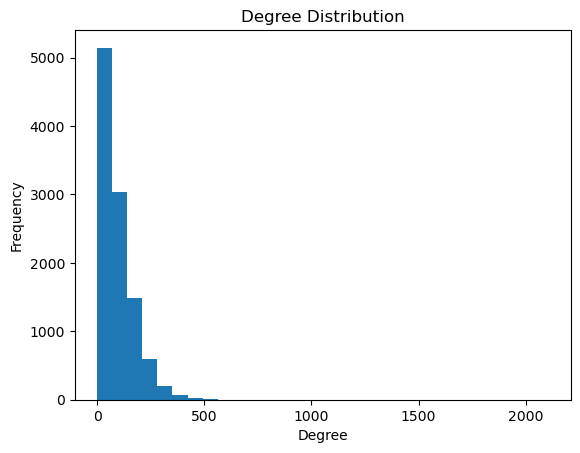

In [6]:
G = nx.read_edgelist('../../../data/Week6/socfb-Northwestern25.edges.gz', nodetype=int)

proportion = len([node for node in G.nodes() if G.degree(node) >= 100]) / len(G.nodes())
degrees = dict(G.degree()).values()
max_degree = max(degrees)
node_highest_degree = max(G, key=G.degree)
percentile_95 = np.percentile(list(degrees), 95)
mean_degree = int(np.mean(list(degrees)))

print("Proportion of nodes with degree 100 or greater:", proportion)
print("Maximum degree in the network:", max_degree)
print("Node with the highest degree:", node_highest_degree)
print("95th percentile for degree:", percentile_95)
print("Mean degree:", mean_degree)

plt.hist(degrees, bins=30)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()
